# Table of Contents

1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Import Data](#import)
4. [Exploratoty Data Analisys](#EDA)


## 1. Introduction
<div id='introduction'/>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<img width="25%" src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg"/>

### Data 
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Link Data and Description https://www.kaggle.com/competitions/spaceship-titanic

## 2. Import Libraries
<div id='libraries'/>

In [1]:
import pandas as pd
import numpy as np

import missingno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score

## 3. Import Data
<div id='import'/>


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print(f"Training set shape : {train.shape}")
print(f"Test set shape : {test.shape}")

Training set shape : (8693, 14)
Test set shape : (4277, 13)


## 4. Exploratory Data Analysis
<div id='EDA'/>

### 4.1 Data types, missing data and statistics

In [6]:
# Data info

train.info()
print("*"*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Ran

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64


<AxesSubplot: >

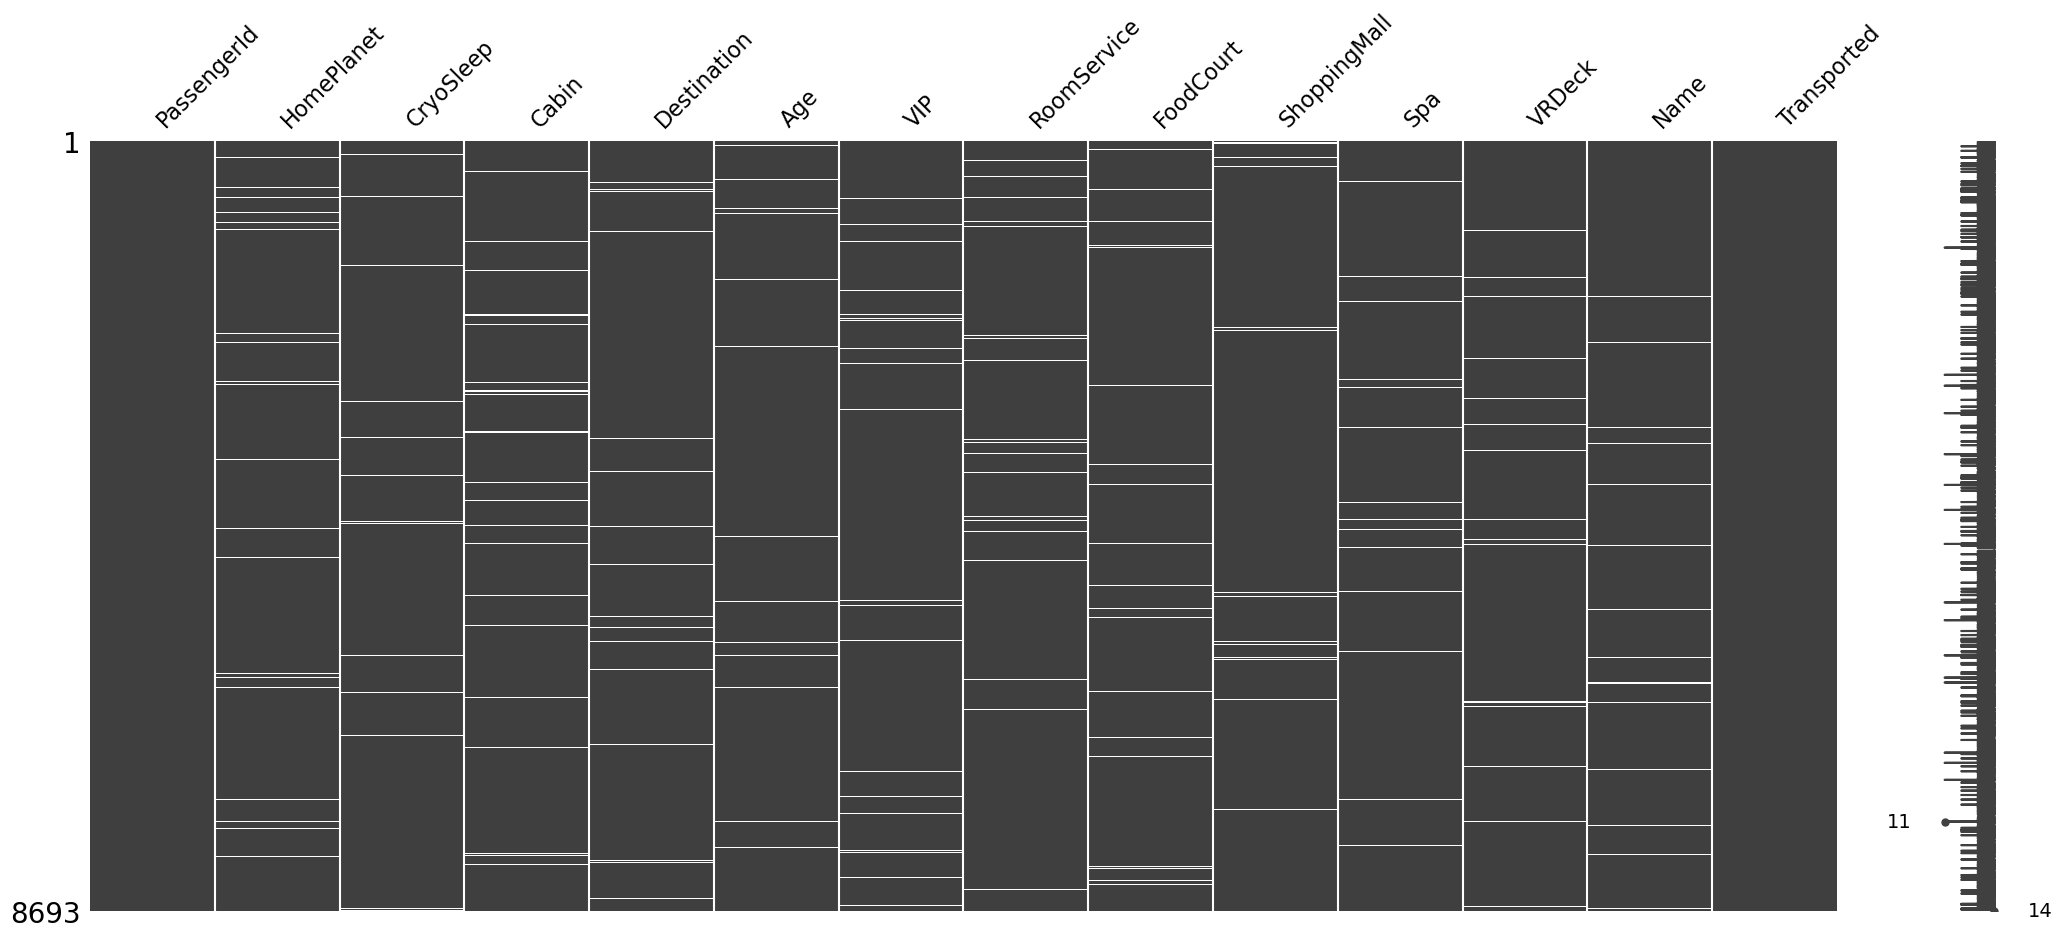

In [7]:
# Missing data in training set

print(train.isnull().sum().sort_values(ascending = False))
missingno.matrix(train)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


<AxesSubplot: >

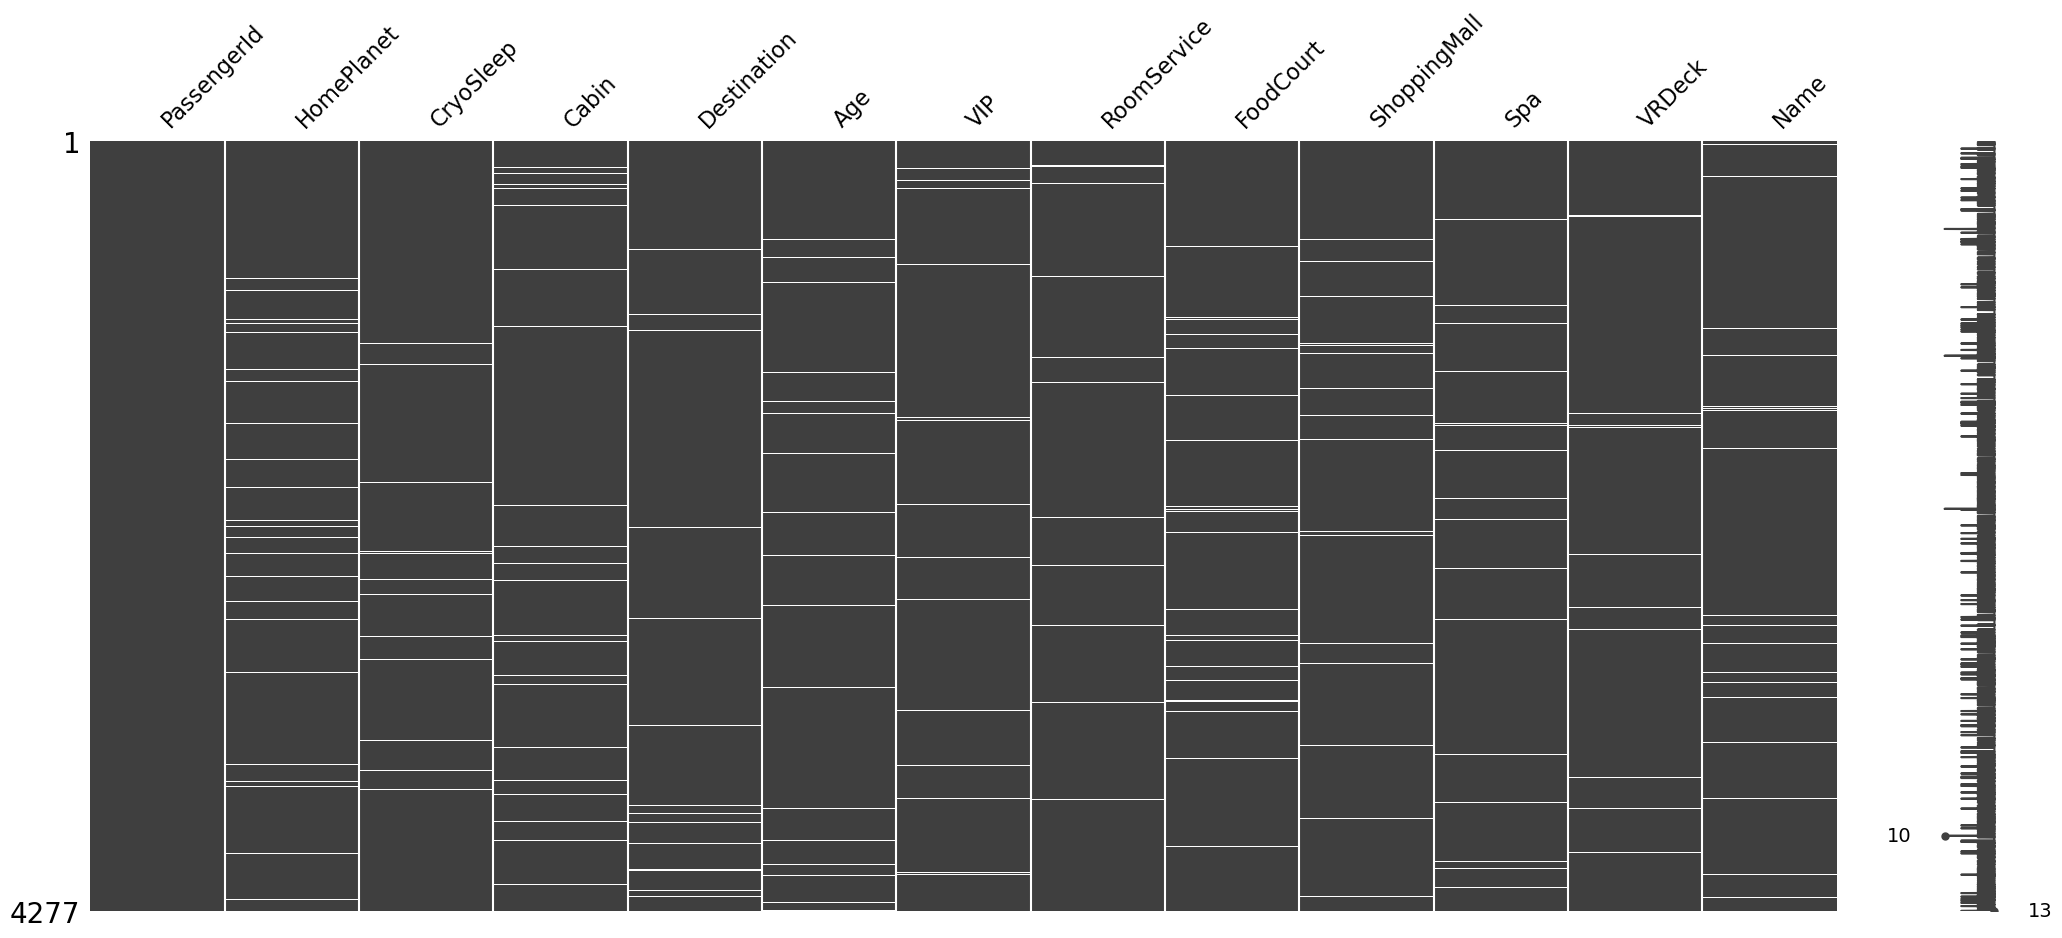

In [8]:
# Missing data in test set

print(test.isnull().sum().sort_values(ascending = False))
missingno.matrix(test)

In [9]:
# Summary statistics

train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
# Summary statistics

test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


### 4.2 Feature Analysis
#### 4.2.1 Categorical variables
Categorical variables in the dataset are HomePlanet, CryoSleep, Cabin, Destination and VIP </br></br>

In [11]:
print("Categorical Variables")
for column in train.select_dtypes(include="object"):
    print(column)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [12]:
train[["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Transported"]].describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Transported
count,8492,8476,8494,8511,8490,8693
unique,3,2,6560,3,2,2
top,Earth,False,G/734/S,TRAPPIST-1e,False,True
freq,4602,5439,8,5915,8291,4378


#### Categorical variable: HomePlanet

In [13]:
train["HomePlanet"].value_counts(dropna = False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [14]:
# Mean of transported by HomePlanet

train[["HomePlanet", "Transported"]].groupby("HomePlanet", as_index = False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


Text(0.5, 1.0, 'Transported probability by Homeplanet')

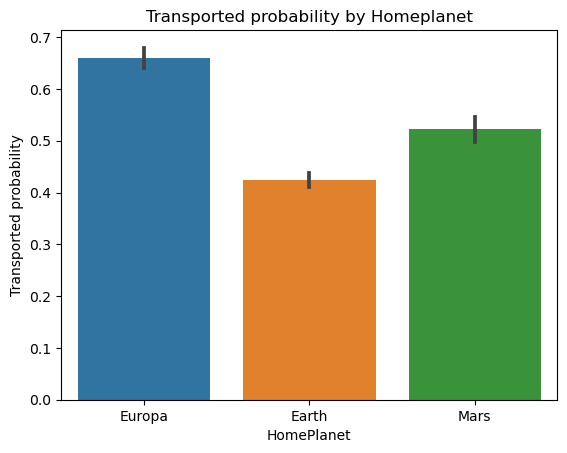

In [15]:
ax = sns.barplot(x = "HomePlanet", y = "Transported", data = train)
ax.set_ylabel("Transported probability")
ax.set_title("Transported probability by Homeplanet")

# Europa passangers are more likely to be transported to another dimension

#### Categorical variable: CryoSleep

In [16]:
train["CryoSleep"].value_counts(dropna = False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [17]:
# Mean of transported by HomePlanet

train[["CryoSleep", "Transported"]].groupby("CryoSleep", as_index = False).mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


Text(0.5, 1.0, 'Transported probability by CryoSleep')

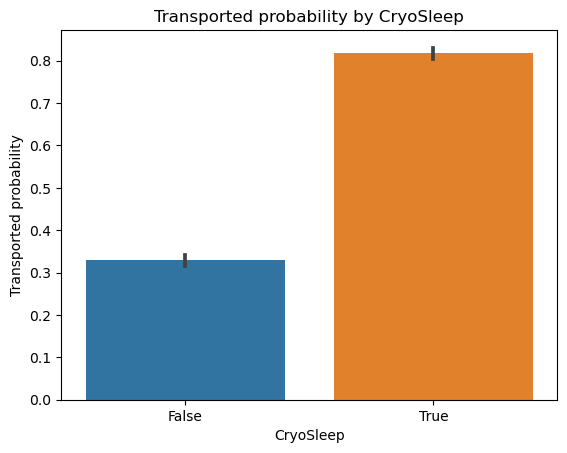

In [18]:
ax = sns.barplot(x = "CryoSleep", y = "Transported", data = train)
ax.set_ylabel("Transported probability")
ax.set_title("Transported probability by CryoSleep")

# Passangers in suspended animation are more likely to be transported to another dimension

#### Categorical variable: Cabin

In [19]:
print(train["Cabin"].value_counts(dropna = False))
print(f"Unique values: {train.Cabin.unique().shape[0]}")



NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64
Unique values: 6561


#### Categorical variable: Destination

In [20]:
train["Destination"].value_counts(dropna = False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [21]:
train[["Destination", "Transported"]].groupby("Destination", as_index = False).mean()

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


Text(0.5, 1.0, 'Transported probability by Destination')

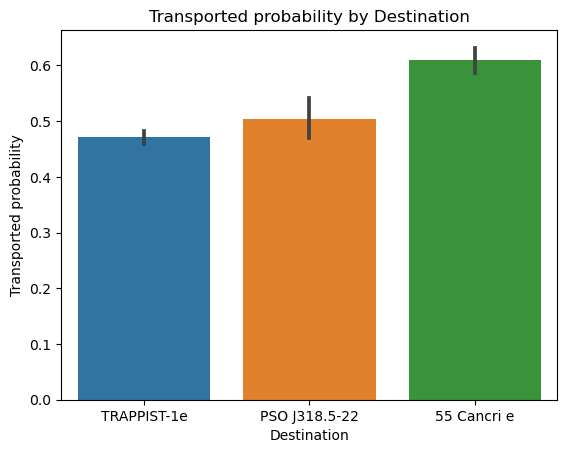

In [22]:
ax = sns.barplot(x = "Destination", y = "Transported", data = train)
ax.set_ylabel("Transported probability")
ax.set_title("Transported probability by Destination")

# Passengers with destination to 55 Cancri e are more likely to be transported to another dimension

#### Categorical variable: VIP

In [23]:
train["VIP"].value_counts(dropna = False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [24]:
train[["VIP", "Transported"]].groupby(by="VIP", as_index = False).mean()

,VIP,Transported
0,False,0.506332
1,True,0.381910


Text(0.5, 1.0, 'Transported probability by VIP')

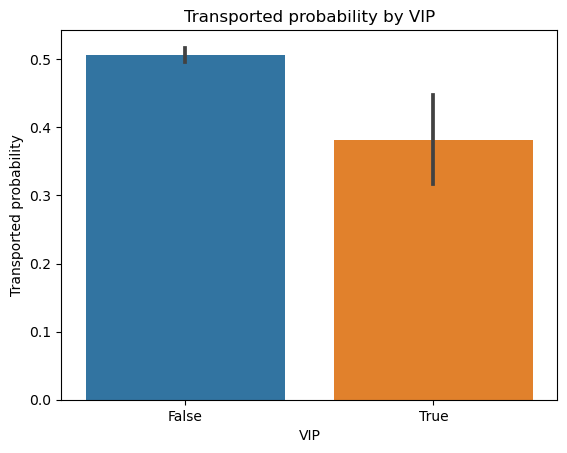

In [25]:
ax = sns.barplot(x = "VIP", y = "Transported", data = train)
ax.set_ylabel("Transported probability")
ax.set_title("Transported probability by VIP")

# Non VIP passengers are more likely to be transported to another dimension

#### Categorical variable: Transported

In [26]:
train["Transported"].value_counts(dropna = False)

# 4378 passengers were transported to another dimension

True     4378
False    4315
Name: Transported, dtype: int64

### 4.2.2 Numerical Variables
Categorical variables in the dataset are Age,  RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck  </br></br>

In [27]:
print("Numerical Variables")
for column in train.select_dtypes(exclude="object"):
    print(column)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


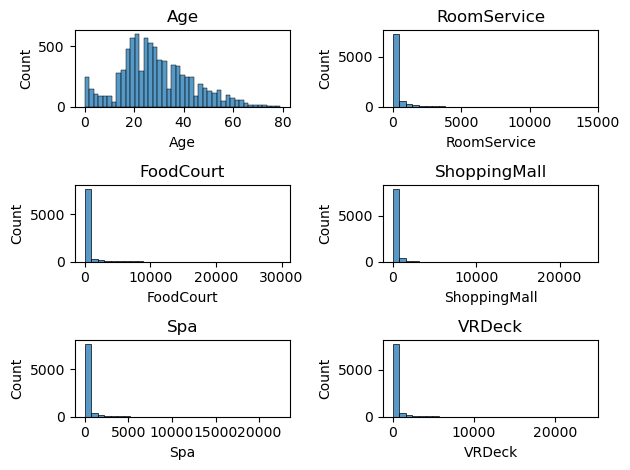

In [28]:
fig, axes = plt.subplots(3, 2)

sns.histplot(train["Age"], ax = axes[0, 0])
sns.histplot(train["RoomService"], bins = 30, ax = axes[0, 1])
sns.histplot(train["FoodCourt"], bins = 30, ax = axes[1, 0])
sns.histplot(train["ShoppingMall"], bins = 30, ax = axes[1, 1])
sns.histplot(train["Spa"], bins = 30, ax = axes[2, 0])
sns.histplot(train["VRDeck"], bins = 30, ax = axes[2, 1])

axes[0, 0].set_title('Age')
axes[0, 1].set_title('RoomService')
axes[1, 0].set_title('FoodCourt')
axes[1, 1].set_title('ShoppingMall')
axes[2, 0].set_title('Spa')
axes[2, 1].set_title('VRDeck')

fig.tight_layout()
plt.show()

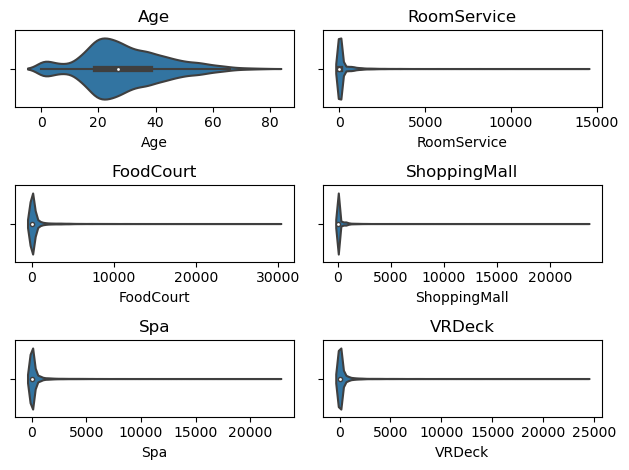

In [29]:
fig, axes = plt.subplots(3, 2)

sns.violinplot(x = train["Age"], ax = axes[0, 0])
sns.violinplot(x = train["RoomService"], ax = axes[0, 1])
sns.violinplot(x = train["FoodCourt"], ax = axes[1, 0])
sns.violinplot(x = train["ShoppingMall"], ax = axes[1, 1])
sns.violinplot(x = train["Spa"], ax = axes[2, 0])
sns.violinplot(x = train["VRDeck"], ax = axes[2, 1])

axes[0, 0].set_title('Age')
axes[0, 1].set_title('RoomService')
axes[1, 0].set_title('FoodCourt')
axes[1, 1].set_title('ShoppingMall')
axes[2, 0].set_title('Spa')
axes[2, 1].set_title('VRDeck')

fig.tight_layout()
plt.show()

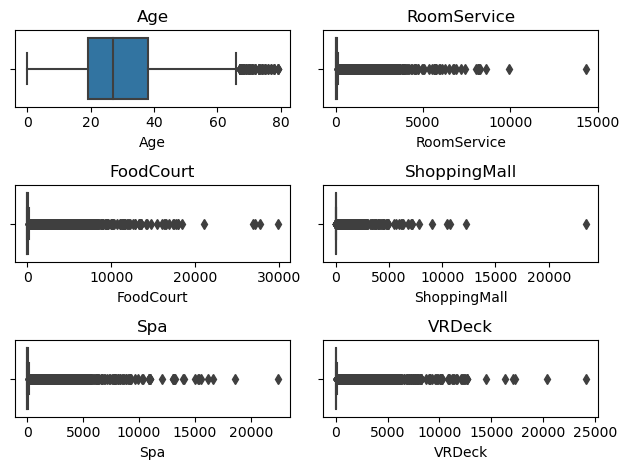

In [30]:
fig, axes = plt.subplots(3, 2)

sns.boxplot(x = train["Age"], ax = axes[0, 0])
sns.boxplot(x = train["RoomService"], ax = axes[0, 1])
sns.boxplot(x = train["FoodCourt"], ax = axes[1, 0])
sns.boxplot(x = train["ShoppingMall"], ax = axes[1, 1])
sns.boxplot(x = train["Spa"], ax = axes[2, 0])
sns.boxplot(x = train["VRDeck"], ax = axes[2, 1])

axes[0, 0].set_title('Age')
axes[0, 1].set_title('RoomService')
axes[1, 0].set_title('FoodCourt')
axes[1, 1].set_title('ShoppingMall')
axes[2, 0].set_title('Spa')
axes[2, 1].set_title('VRDeck')

fig.tight_layout()
plt.show()

#### Numerical variables correlation with survival

<AxesSubplot: >

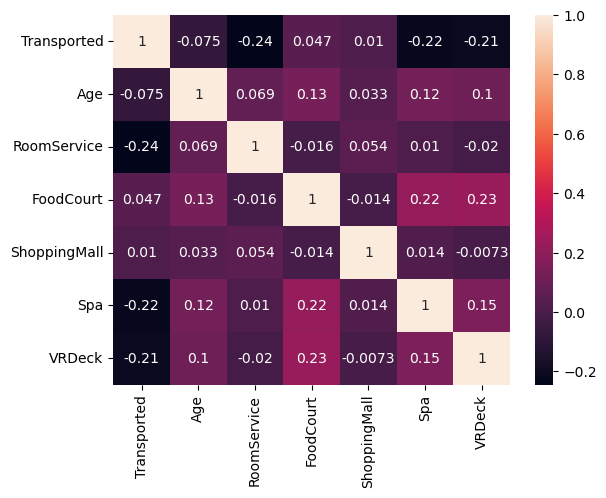

In [31]:
sns.heatmap(train[["Transported", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].corr(), annot = True)

### 5. Data preprocessing

#### 5.1 Combine sets

In [32]:
# Target value

target = train["Transported"].replace({False : 0, True  : 1})
train.drop(["Transported"], axis = 1, inplace = True)

In [33]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [34]:
all_data = pd.concat([train, test])

In [35]:
all_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [36]:
all_data.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
dtype: int64

### HomePlanet

In [37]:
print(all_data.HomePlanet.value_counts())
all_data.HomePlanet.value_counts().max()

# Most frequent home planet: Earth

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64


6865

In [38]:
all_data.HomePlanet.fillna("Earth", inplace = True)

### CryoSleep

In [39]:
print(all_data.CryoSleep.value_counts())
all_data.CryoSleep.value_counts().max()

# Most frequent CryoSleep: False

False    8079
True     4581
Name: CryoSleep, dtype: int64


8079

In [40]:
all_data.CryoSleep.fillna(True, inplace = True)
all_data.CryoSleep = all_data.CryoSleep.replace({False : 0, True  : 1})

### Cabin

In [41]:
all_data.Cabin = all_data["Cabin"].apply(lambda cabinName: str(cabinName).split("/")[0])

In [42]:
all_data.Cabin.value_counts()

F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
nan     299
T        11
Name: Cabin, dtype: int64

In [43]:
all_data.Cabin = all_data.Cabin.replace({"nan" : "F"})

In [44]:
all_data.Cabin.value_counts()

F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Cabin, dtype: int64

### Destination

In [45]:
print(all_data.Destination.value_counts())
all_data.Destination.value_counts().max()

# Most common destionation: TRAPPIST-1e 

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64


8871

In [46]:
all_data.Destination.fillna("TRAPPIST-1e", inplace = True)

### Age

In [47]:
all_data.Age.fillna(all_data.Age.mean(), inplace = True)

In [48]:
all_data["Age_group"]  = pd.cut(x = all_data["Age"], bins = [-1, 14, 30, 65, 100], labels = ["child", "young adult", "adult", "elder"])
all_data.drop("Age", axis = 1, inplace = True)
all_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_group
0,0001_01,Europa,0,B,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,adult
1,0002_01,Earth,0,F,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,young adult
2,0003_01,Europa,0,A,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,adult
3,0003_02,Europa,0,A,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,adult
4,0004_01,Earth,0,F,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,adult
4273,9269_01,Earth,0,F,TRAPPIST-1e,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,adult
4274,9271_01,Mars,1,D,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,young adult
4275,9273_01,Europa,0,D,TRAPPIST-1e,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,young adult


### VIP

In [49]:
print(all_data.VIP.value_counts())
all_data.VIP.value_counts().max()

# Most common destionation: TRAPPIST-1e 

False    12401
True       273
Name: VIP, dtype: int64


12401

In [50]:
all_data.VIP.fillna(False, inplace = True)

In [51]:
all_data.VIP = all_data.VIP.replace({True : 1, False : 0})

### RoomService, FoodCourt,	ShoppingMall, Spa and VRDeck

In [52]:
num_variables = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for num_variable in num_variables:
    all_data[num_variable].fillna(all_data[num_variable].mean(), inplace = True)

### Name

In [53]:
all_data.drop("Name", inplace = True, axis = 1)

In [54]:
all_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Age_group       0
dtype: int64

In [55]:
all_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group
0,0001_01,Europa,0,B,TRAPPIST-1e,0,0.0,0.0,0.0,0.0,0.0,adult
1,0002_01,Earth,0,F,TRAPPIST-1e,0,109.0,9.0,25.0,549.0,44.0,young adult
2,0003_01,Europa,0,A,TRAPPIST-1e,1,43.0,3576.0,0.0,6715.0,49.0,adult
3,0003_02,Europa,0,A,TRAPPIST-1e,0,0.0,1283.0,371.0,3329.0,193.0,adult
4,0004_01,Earth,0,F,TRAPPIST-1e,0,303.0,70.0,151.0,565.0,2.0,young adult


### Going from continuos variables to categorical variables
RoomService	FoodCourt, ShoppingMall, Spa, VRDeck

In [56]:
all_data.describe()

,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,0.377101,0.021049,222.897852,451.961675,174.906033,308.476904,306.789482
std,0.484679,0.143552,640.996685,1566.618306,583.550067,1117.835494,1167.840416
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,79.000000,126.000000,47.000000,87.000000,64.000000
max,1.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [57]:
all_data["RoomService_group"]  = pd.cut(x = all_data["RoomService"], bins = [-1, 2000, 8000, 15000], labels = ["low", "medium", "high"])
all_data.drop("RoomService", axis = 1, inplace = True)

In [58]:
all_data["FoodCourt_group"]  = pd.cut(x = all_data["FoodCourt"], bins = [-1, 5000, 15000, 30000], labels = ["low", "medium", "high"])
all_data.drop("FoodCourt", axis = 1, inplace = True)

In [59]:
all_data["ShoppingMall_group"]  = pd.cut(x = all_data["ShoppingMall"], bins = [-1, 5000, 12000, 25000], labels = ["low", "medium", "high"])
all_data.drop("ShoppingMall", axis = 1, inplace = True)

In [60]:
all_data["Spa_group"]  = pd.cut(x = all_data["Spa"], bins = [-1, 5000, 12000, 25000], labels = ["low", "medium", "high"])
all_data.drop("Spa", axis = 1, inplace = True)

In [61]:
all_data["VRDeck_group"]  = pd.cut(x = all_data["VRDeck"], bins = [-1, 5000, 12000, 25000], labels = ["low", "medium", "high"])
all_data.drop("VRDeck", axis = 1, inplace = True)

In [62]:
all_data.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_group,RoomService_group,FoodCourt_group,ShoppingMall_group,Spa_group,VRDeck_group
0,0001_01,Europa,0,B,TRAPPIST-1e,0,adult,low,low,low,low,low
1,0002_01,Earth,0,F,TRAPPIST-1e,0,young adult,low,low,low,low,low
2,0003_01,Europa,0,A,TRAPPIST-1e,1,adult,low,low,low,medium,low
3,0003_02,Europa,0,A,TRAPPIST-1e,0,adult,low,low,low,low,low
4,0004_01,Earth,0,F,TRAPPIST-1e,0,young adult,low,low,low,low,low
5,0005_01,Earth,0,F,PSO J318.5-22,0,adult,low,low,low,low,low
6,0006_01,Earth,0,F,TRAPPIST-1e,0,young adult,low,low,low,low,low
7,0006_02,Earth,1,G,TRAPPIST-1e,0,young adult,low,low,low,low,low
8,0007_01,Earth,0,F,TRAPPIST-1e,0,adult,low,low,low,low,low
9,0008_01,Europa,1,B,55 Cancri e,0,child,low,low,low,low,low


In [63]:
for i in ["RoomService_group", "FoodCourt_group", "ShoppingMall_group","Spa_group","VRDeck_group"]:
    print(all_data[i].value_counts())
    print()

low       12670
medium      290
high         10
Name: RoomService_group, dtype: int64

low       12698
medium      247
high         25
Name: FoodCourt_group, dtype: int64

low       12943
medium       25
high          2
Name: ShoppingMall_group, dtype: int64

low       12824
medium      121
high         25
Name: Spa_group, dtype: int64

low       12805
medium      139
high         26
Name: VRDeck_group, dtype: int64



### One Hot Encoding

In [64]:
variables = ["HomePlanet", "Cabin", "Destination", "Age_group", "RoomService_group", "FoodCourt_group", "ShoppingMall_group", "Spa_group", "VRDeck_group"]
dummies = pd.get_dummies(all_data[variables])
dummies

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,FoodCourt_group_high,ShoppingMall_group_low,ShoppingMall_group_medium,ShoppingMall_group_high,Spa_group_low,Spa_group_medium,Spa_group_high,VRDeck_group_low,VRDeck_group_medium,VRDeck_group_high
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4273,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4274,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4275,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [65]:
all_data.drop(variables, inplace = True, axis = 1)

In [66]:
all_data = pd.concat([all_data, dummies], axis = 1) 

In [67]:
all_data.head()

,PassengerId,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,FoodCourt_group_high,ShoppingMall_group_low,ShoppingMall_group_medium,ShoppingMall_group_high,Spa_group_low,Spa_group_medium,Spa_group_high,VRDeck_group_low,VRDeck_group_medium,VRDeck_group_high
0,0001_01,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0002_01,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0003_01,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,0003_02,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0004_01,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


### Predictions

In [68]:
features = list(all_data.columns)
features.remove("PassengerId")

In [69]:
y = target
X = all_data[features][0 : len(train)]
X_test = all_data[features][len(train) :]

### Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30)

In [71]:
clf = LogisticRegression(max_iter= 1000).fit(X_train, y_train)

In [72]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_val)
print("Logistic Regression accuracy validation set", accuracy_score(y_val, predictions))
print("Logistic Regression accuracy train set", accuracy_score(y_train, clf.predict(X_train)))

Logistic Regression accuracy validation set 0.7358128834355828
Logistic Regression accuracy train set 0.7362366474938373


In [73]:
print("Logistic Regression accuracy validation set", clf.score(X_val, y_val))
print("Logistic Regression accuracy train set", clf.score(X_train, y_train))

Logistic Regression accuracy validation set 0.7358128834355828
Logistic Regression accuracy train set 0.7362366474938373


### Decision Tree

In [74]:
from sklearn import tree
tree_model =  tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_val)

In [75]:
print("Decision Tree accuracy validation set", accuracy_score(y_val, predictions))
print("Decision Tree accuracy train set", accuracy_score(y_train, tree_model.predict(X_train)))

Decision Tree accuracy validation set 0.7373466257668712
Decision Tree accuracy train set 0.7562859490550534


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
forest_model =  RandomForestClassifier(n_estimators=100, max_depth=None)
forest_model.fit(X_train, y_train)
predictions = forest_model.predict(X_val)

In [77]:
print("Random Forest accuracy validation set", accuracy_score(y_val, predictions))
print("Random Forest accuracy train set", accuracy_score(y_train, forest_model.predict(X_train)))

Random Forest accuracy validation set 0.7419478527607362
Random Forest accuracy train set 0.7562859490550534


### XGBoost

In [78]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators = 150)
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [79]:
print("XGBoost accuracy validation set", accuracy_score(y_val, predictions))
print("XGBoost accuracy train set", accuracy_score(y_train, model.predict(X_train)))

XGBoost accuracy validation set 0.7442484662576687
XGBoost accuracy train set 0.7552999178307314


### Submission

In [84]:
submission_predictions = model.predict(X_test)

In [85]:
submission = pd.DataFrame({"PassengerId":all_data["PassengerId"][len(train) :], "Transported":submission_predictions})

In [86]:
submission.Transported.replace({0: "False", 1: "True"}, inplace = True)

In [87]:
submission.to_csv("submissionv1.csv", index = False)